##### 2-March-21

## Automobile Dataset Analysis

The autmobile dataset comprises of multiple characetistics of several automobiles.  
In this notebook, we will draw meaningful inferences that will give us an insight into the autombile industry.

Content Overview
   1. Data Cleaning
   2. Visualization
   3. Model Building

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Understanding the data

In [3]:
df.describe().round(2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

From above, it seems there are no null values.   
However, from df.head() we have seen there are values with '?' symbol amidst them.    
We will need to impute those values.

We also notice that several features which are supposed to be numeric (such as normalized-losses,  price, horsepower, etc) are object type.  
This most likely means they too have '?' symbol within its values.

Lets check the normalized-losses object variable a bit more closely to confirm our suspicion.

In [5]:
df['normalized-losses'].value_counts()

?      41
161    11
91      8
150     7
128     6
104     6
134     6
102     5
85      5
168     5
94      5
95      5
65      5
103     5
74      5
106     4
93      4
148     4
118     4
122     4
137     3
125     3
101     3
115     3
154     3
83      3
110     2
197     2
113     2
158     2
129     2
194     2
87      2
164     2
188     2
119     2
192     2
81      2
145     2
153     2
89      2
108     2
77      1
186     1
231     1
78      1
98      1
142     1
107     1
256     1
121     1
90      1
Name: normalized-losses, dtype: int64

As we see, there is '?' symbol within the column values.  
We will need to replace it with null value at the moment.  
Why with null value ?  
Because only then we can convert it to numerical type variable,  
and perform statistical operations on it like calculating mean, mode, median etc.  
Using those values, we can impute the missing data.

In [6]:
df = df.replace('?', np.nan)
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

From above code, we have replaced '?' with null value in the entire dataframe.  
Next we check the dtypes of the variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Clearly, we need to convert the dtypes into appropriate types.

In [8]:
df['normalized-losses'].astype(str).astype(float)

0        NaN
1        NaN
2        NaN
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

Instead of manually converting each mistyped variable to float, lets automate it using a loop.

In [9]:
for col in df.select_dtypes(include="object"):
    try:
        df[col] = df[col].astype(str).astype(float)
    except:
        pass

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

It looks like we have converted them all.  
But lets check it once to confirm.

In [11]:
df.select_dtypes(include = 'object').head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


From the above table, we see two variables that can be converted to numeric type.  
Let's check these variables first.

In [12]:
df[['num-of-doors']].value_counts()

num-of-doors
four            114
two              89
dtype: int64

In [13]:
df[['num-of-cylinders']].value_counts()

num-of-cylinders
four                159
six                  24
five                 11
eight                 5
two                   4
twelve                1
three                 1
dtype: int64

Clearly, these can be replaced with their respective numeric values.  
Let's replace them accordingly.

In [14]:
df['num-of-doors'] = df['num-of-doors'].replace({'four':4, 'two':2})
df['num-of-doors'].value_counts()

4.0    114
2.0     89
Name: num-of-doors, dtype: int64

In [15]:
df['num-of-cylinders'].replace({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}, inplace = True)
df['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

In [16]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.83,1.25,-2.00,0.00,1.00,2.00,3.00
normalized-losses,164.0,122.00,35.44,65.00,94.00,115.00,150.00,256.00
num-of-doors,203.0,3.12,0.99,2.00,2.00,4.00,4.00,4.00
wheel-base,205.0,98.76,6.02,86.60,94.50,97.00,102.40,120.90
length,205.0,174.05,12.34,141.10,166.30,173.20,183.10,208.10
width,205.0,65.91,2.15,60.30,64.10,65.50,66.90,72.30
height,205.0,53.72,2.44,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.57,520.68,1488.00,2145.00,2414.00,2935.00,4066.00
num-of-cylinders,205.0,4.38,1.08,2.00,4.00,4.00,4.00,12.00
engine-size,205.0,126.91,41.64,61.00,97.00,120.00,141.00,326.00


From the count column of the above table, we can see which columns have missing values.  
We will impute them one by one.

## Handling Null Values

First, we will find the correlation of each variable combination.  
This will enable us to decide which variable to compare with when handling null values.

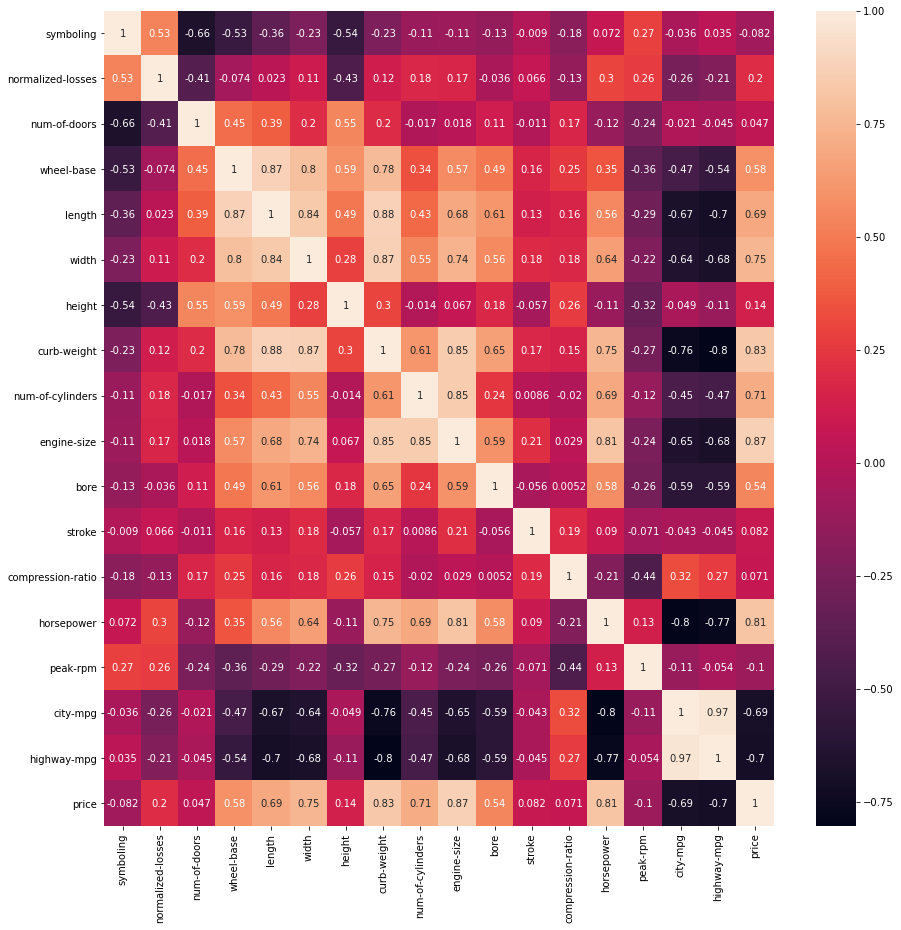

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot = True);

### Imputing by mode

#### First, we impute the num-of-doors column.  
We know logically that number of doors depends on body-style of car.  
That is, convertible and hardtop have two doors, while rest have 4.  
Let's check our understanding using graphs.

<AxesSubplot:xlabel='body-style', ylabel='count'>

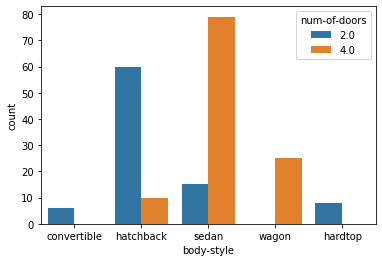

In [18]:
sns.countplot(data=df, x='body-style', hue='num-of-doors')

From the above graph, we realize our understanding was partially correct.  
(This is exactly why we should always check our assumptions using visual representations.)  

In [19]:
df[df['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


As the body-style of these cars is sedan, we can impute num-of-doors as 4, as seen from above graphical representation.

In [20]:
df['num-of-doors'].fillna(4, inplace = True)

### Imputing by Visualizing

#### Second, we will impute the stroke and bore columns

In [21]:
df[df['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


'stroke' and 'bore' are dimensions of the cylinder in an automobile engine.  
That is, we may see some correlation between these variables.  
Lets check our understanding using graphical representation.

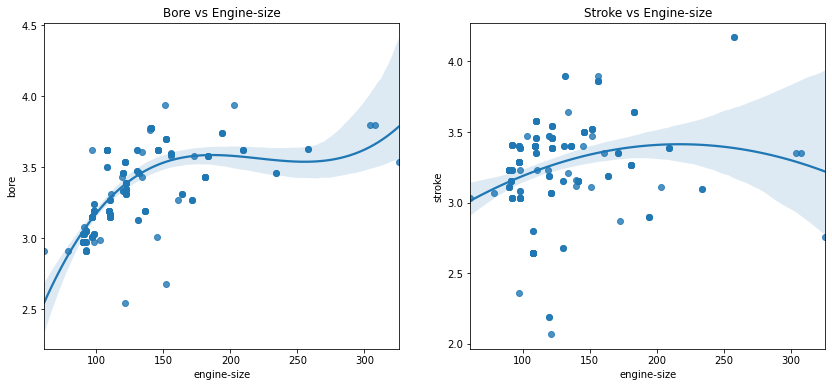

In [22]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='engine-size',y='bore', order = 3)
plt.title('Bore vs Engine-size')
plt.subplot(1,2,2)
sns.regplot(data=df, x='engine-size',y='stroke', order = 2)
plt.title('Stroke vs Engine-size');

Clearly, bore is linear to engine-size.  
We will impute the missing values of bore accordingly.  
While stroke seems to be concentrated at one point.  

In our missing data for stroke and bore, the engine size was at 70 and 80 units.  
Eyeballing those values in these graphs, it seems that  
For engine size = 70, bore = 3.0, stroke = 3.0  
For engine size = 80, bore = 3.0, stroke = 3.0

We will impute the values accordingly.

In [23]:
df['bore'].fillna(3, inplace = True)
df['stroke'].fillna(3, inplace = True)

#### Thrid, we impute horsepower column

In [24]:
df[df['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [25]:
df[['horsepower']].describe().round(1)

,horsepower
count,203.0
mean,104.3
std,39.7
min,48.0
25%,70.0
50%,95.0
75%,116.0
max,288.0


#### To replace missing values of horsepower
We must first check which variable does it more correspond to.

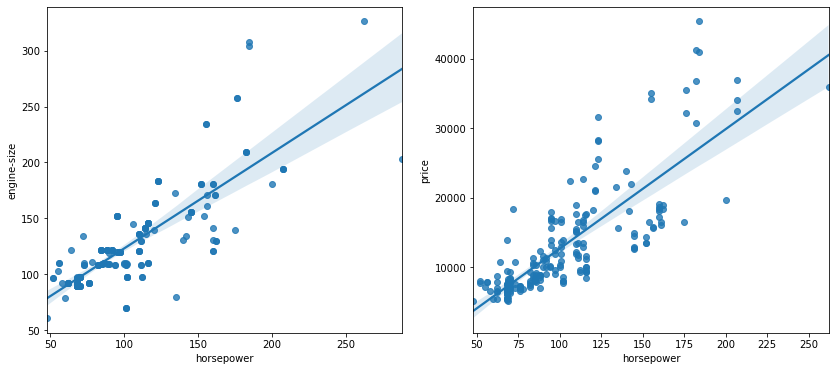

In [26]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='horsepower',y='engine-size')
plt.subplot(1,2,2)
sns.regplot(data=df, x='horsepower',y='price');

We see from above two charts that price seems to have a more accurate relation with horsepower than does engine-size.  
Logically too this makes sense. Two cars of different make may have same engine-size but will have different price.

In [27]:
df[df['engine-size'].between(130,134)].sort_values(['engine-size'],ascending = True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
198,-2,103.0,volvo,gas,turbo,4.0,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18420.0
199,-1,74.0,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162.0,5100.0,17,22,18950.0
8,1,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895.0
66,0,NaN,mazda,diesel,std,4.0,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0
117,0,161.0,peugot,gas,turbo,4.0,sedan,rwd,front,108.0,...,134,mpfi,3.61,3.21,7.0,142.0,5600.0,18,24,18150.0


In [28]:
df[df['price'].between(9000,10000)].sort_values(['price'],ascending = True)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
38,0,106.0,honda,gas,std,2.0,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,9095.0
144,0,102.0,subaru,gas,std,4.0,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233.0
162,0,91.0,toyota,gas,std,4.0,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,9258.0
87,1,125.0,mitsubishi,gas,turbo,4.0,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
88,-1,137.0,mitsubishi,gas,std,4.0,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
165,1,168.0,toyota,gas,std,2.0,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
187,2,94.0,volkswagen,diesel,turbo,4.0,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68.0,4500.0,37,42,9495.0
166,1,168.0,toyota,gas,std,2.0,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0
100,0,106.0,nissan,gas,std,4.0,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97.0,5200.0,27,34,9549.0


In [29]:
df[df['price'].between(9000,10000)]['horsepower'].mode()

0    116.0
dtype: float64

Considering the above data analysis, I will impute the value '116' into the horsepower missing data.

In [30]:
df['horsepower'].fillna(116, inplace = True)

Now lets see which other columns have missing values that we need to impute.

In [31]:
for col in df:
    if df[col].isna().sum()>0: print(col,':', df[col].isna().sum())

normalized-losses : 41
peak-rpm : 2
price : 4


#### Imputing Price column

In [32]:
df[df['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


We know from our understanding that price of a car depends on two major factors.  
First, the brand (make). Second, the performance (engine).  
Lets check our assumption through visual representation.

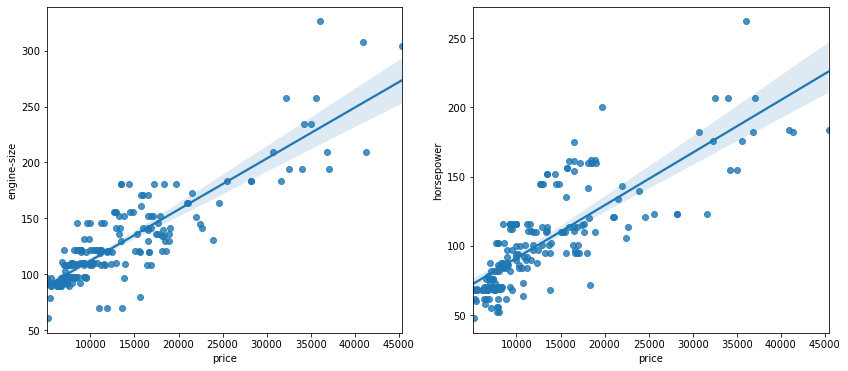

In [33]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.regplot(data=df, x='price',y='engine-size')
plt.subplot(1,2,2)
sns.regplot(data=df, x='price',y='horsepower');

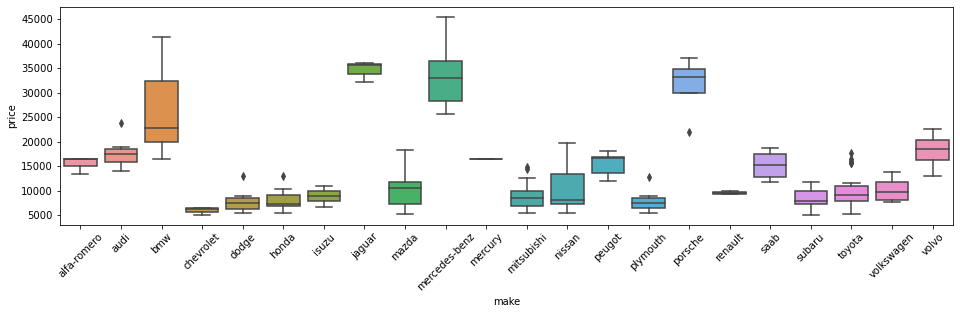

In [34]:
plt.figure(figsize = (16,4))
sns.boxplot(data=df, x='make', y='price')
plt.xticks(rotation = 45);

<AxesSubplot:xlabel='make', ylabel='price'>

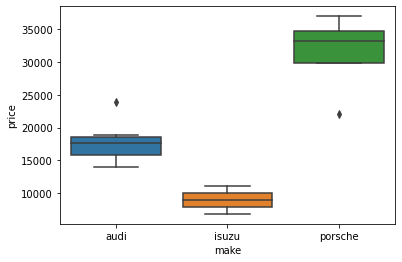

In [35]:
df_3 = df[df['make'].isin(['audi','isuzu','porsche'])]
sns.boxplot(data=df_3, x="make", y="price")

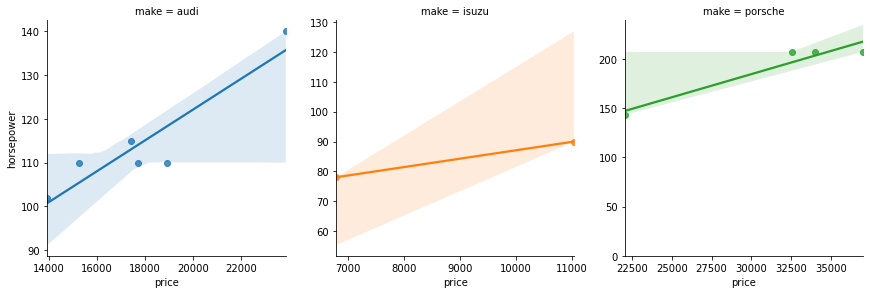

In [36]:
# Lets look at the price/horsepower variation with respect to the make

sns.lmplot(data=df_3,
           x='price',
           y='horsepower',
           hue='make',
           col_wrap = 4,
           col='make',
           height = 4, 
           sharex = False,
           sharey = False)
plt.ylim(ymin=0);

The above charts certainly give us a better picture of the data distribution of price.

Lets look at the missing data of price column again, but this time with just horespower and make.

From above we can estimate,    
- for an Audi with horsepower 160, the price can be around 25000  
- for an isuzu with horsepower 70, the price can be around 7000  
- for a  porsche with horsepower 288, the price can be around 375000

Lets impute the missing values accordingly

In [37]:
df[df['price'].isna()][['make','horsepower','price']]

,make,horsepower,price
9,audi,160.0,NaN
44,isuzu,70.0,NaN
45,isuzu,70.0,NaN
129,porsche,288.0,NaN


From above we can estimate,    
- for an Audi with horsepower 160, the price can be around 25000  
- for an isuzu with horsepower 70, the price can be around 7000  
- for a  porsche with horsepower 288, the price can be around 375000

Lets impute the missing values accordingly

In [38]:
df.loc[df['make']=='audi'][['price']].fillna(25000, inplace = True)
df[df['make']=='isuzu'][['price']].fillna(7000, inplace = True)
df[df['make']=='porsche'][['price']].fillna(37500, inplace = True)

In [39]:
df['price'] = df['price'].fillna(pd.Series(np.where(df['make'] == 'audi', 25000, 
                                                    np.where(df['make']=='isuzu', 7000,
                                                            np.where(df['make']=='porsche',37500, df['price'].mean())))))


In [40]:
df[df['price'].isna()][['make','horsepower','price']]

,make,horsepower,price


In [41]:
for col in df:
    if df[col].isna().sum()>0: print(col,'\t', df[col].isna().sum())

normalized-losses 	 41
peak-rpm 	 2


#### Fifth, we impute Peak RPM

In [42]:
df[df['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,116.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,116.0,NaN,23,31,9895.0


Immediately we notice that many variables are same for both the missing value rows.  
Lets see more observations around the data 116 horsepower.  

In [43]:
df[df['horsepower'].between(115,117)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
80,3,153.0,mitsubishi,gas,turbo,2.0,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9959.0
87,1,125.0,mitsubishi,gas,turbo,4.0,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
88,-1,137.0,mitsubishi,gas,std,4.0,sedan,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
130,0,NaN,renault,gas,std,4.0,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,116.0,NaN,23,31,9295.0
131,2,NaN,renault,gas,std,2.0,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,116.0,NaN,23,31,9895.0
167,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,8449.0
168,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9639.0
169,2,134.0,toyota,gas,std,2.0,hatchback,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9989.0
170,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,...,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0


Contrary to our assumption, horespower seems to be constant despite change in peak rpm.  
However, there seems to some relation of peak-rpm with compression ratio and stroke.  
Lets visually check our assumption.

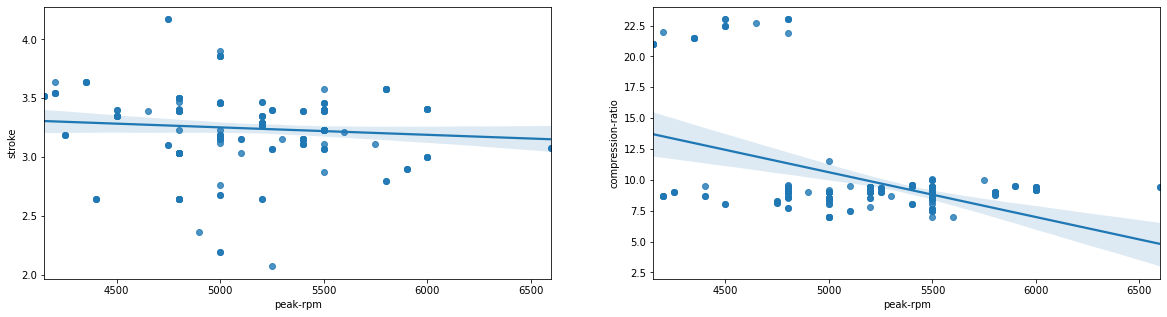

In [44]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.regplot(data=df, x='peak-rpm',y='stroke')
plt.subplot(1,2,2)
sns.regplot(data=df, x='peak-rpm',y='compression-ratio');


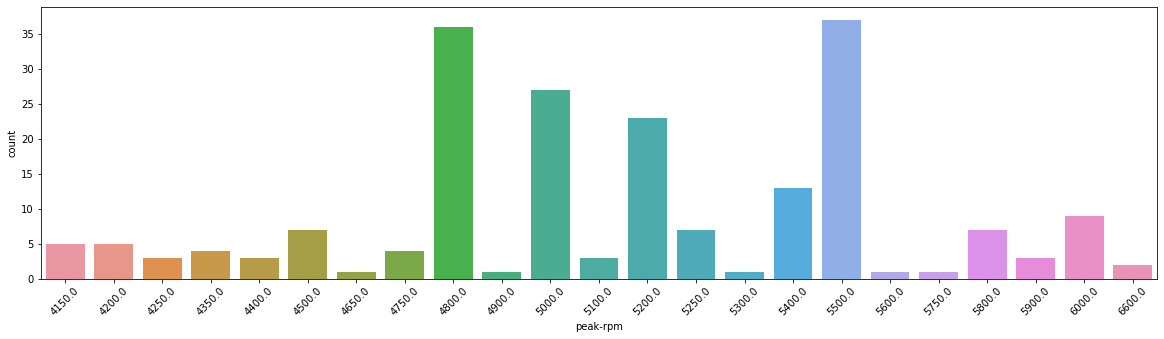

In [45]:
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='peak-rpm')
plt.xticks(rotation = 45);

In [46]:
df['peak-rpm'].fillna(4500, inplace = True)

In [47]:
for col in df:
    if df[col].isna().sum()>0: print(col,'\t', df[col].isna().sum())

normalized-losses 	 41


#### Imputing null values for normalized-losses

To do this, first I need to see which variable has a relation with normalized-values.  
For this, we will plot several graphs and analyze to understand the distribution better.

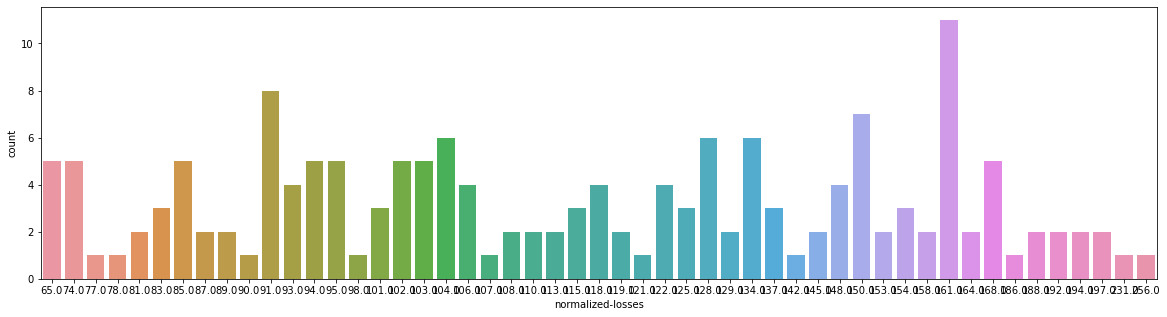

In [48]:
plt.figure(figsize=(20,5))
sns.countplot(data=df, x='normalized-losses');

<AxesSubplot:>

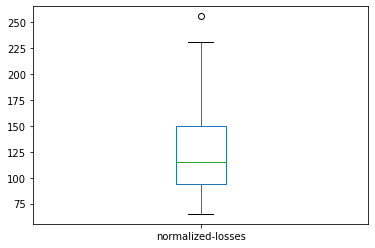

In [49]:
df['normalized-losses'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

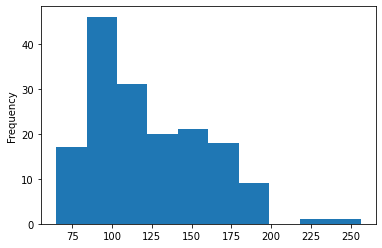

In [50]:
df['normalized-losses'].plot(kind = 'hist')

In [51]:
df[df['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,25000.0
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [52]:
df.groupby(by = 'make', axis = 0).mean().round(1)

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
make,,,,,,,,,,,,,,,,,,
alfa-romero,2.3,NaN,2.0,90.6,169.6,64.6,50.0,2639.7,4.7,137.3,3.2,2.9,9.0,125.3,5000.0,20.3,26.7,15498.3
audi,1.3,161.0,3.4,102.3,183.8,68.7,54.4,2800.7,4.9,130.7,3.2,3.4,8.4,121.0,5500.0,18.9,24.1,18879.3
bmw,0.4,190.0,3.2,103.2,184.5,66.5,54.8,2929.4,5.5,166.9,3.5,3.2,8.6,138.9,5068.8,19.4,25.4,26118.8
chevrolet,1.0,100.0,2.7,92.5,151.9,62.5,52.4,1757.0,3.7,80.3,3.0,3.1,9.6,62.7,5300.0,41.0,46.3,6007.0
dodge,1.0,133.4,3.1,95.0,161.0,64.2,51.6,2151.3,4.0,102.7,3.1,3.4,8.6,86.3,5388.9,28.0,34.1,7875.4
honda,0.6,103.0,2.8,94.3,160.8,64.4,53.2,2096.8,4.0,99.3,3.0,3.5,9.2,80.2,5753.8,30.4,35.5,8184.7
isuzu,0.8,NaN,3.0,94.8,163.8,63.6,52.2,2213.5,4.0,102.5,3.2,3.2,9.2,77.0,5150.0,31.0,36.0,7958.2
jaguar,0.0,145.0,3.3,109.3,197.0,69.9,51.1,4027.3,8.0,280.7,3.6,3.7,9.2,204.7,4833.3,14.3,18.3,34600.0
mazda,1.1,123.9,2.9,97.0,170.8,65.6,53.4,2297.8,3.5,103.0,3.2,3.2,10.5,85.5,5108.8,25.7,31.9,10652.9


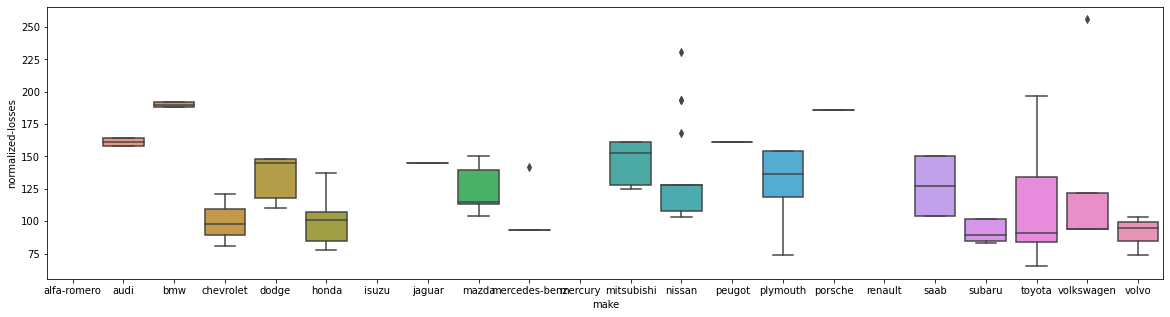

In [53]:
plt.figure(figsize = (20,5))
sns.boxplot(data=df, x='make', y='normalized-losses');

In [54]:
df['normalized-losses']= df.groupby(df.make).transform(lambda x: x.fillna(x.mean()))
df[df['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [55]:
for col in df:
    if df[col].isna().sum()>0: print(col, df[col].isna().sum())

Now that we have imputed all the missing values, and in the process have done EDA, we can move on to modelling.

## Machine Learning Model
####                    to predict Symboling

In order to proceed with machine learning, our first step is to check for multicollinearity if any.

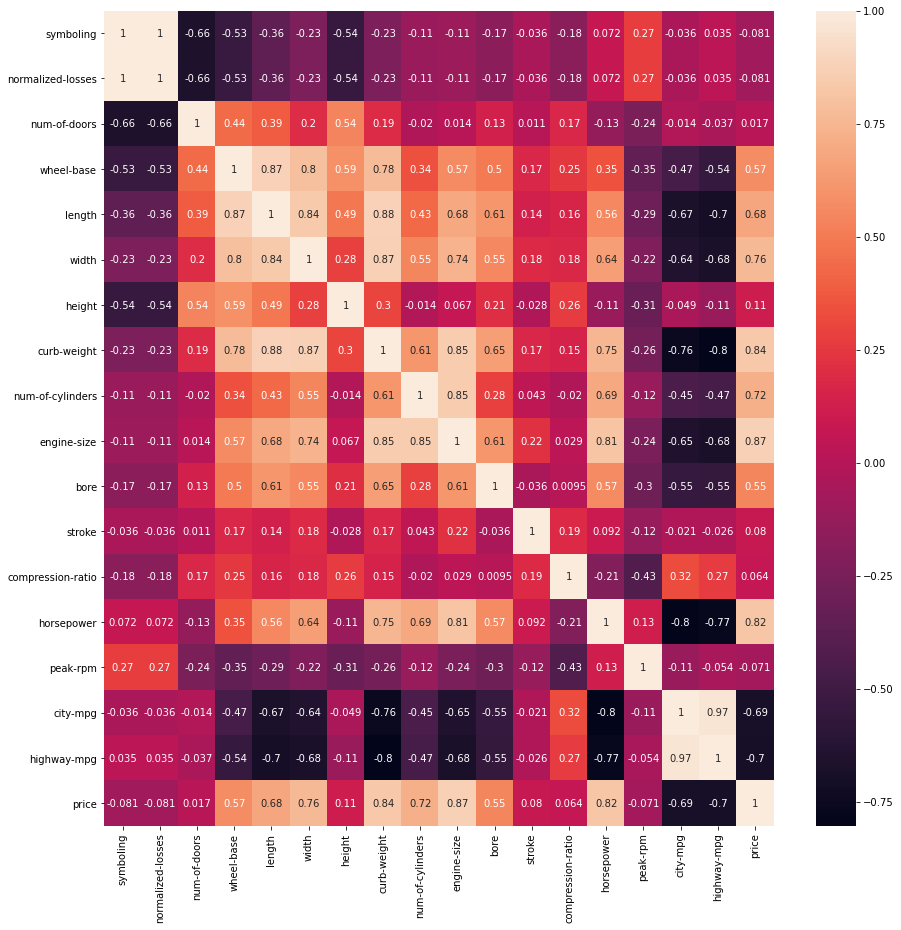

In [56]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot= True);

### Handling Multicollinearity

There are three ways to handle multi-collinearity
1. Calculate VIF and remove manually the variables whose VIF is greater than 10
2. Combine multiple variables in a meaningful manner
3. Use PCA to automatically reduce the dimension

### Calculating VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 

# the independent variables set 
X = df.select_dtypes(include = ["float64","int64"])
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [vif(X.values, i) 
                          for i in range(len(X.columns))] 
  
vif_data[vif_data["VIF"]<100000].round(2)

C:\Users\KennyD\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
2,num-of-doors,24.98
3,wheel-base,2466.35
4,length,2049.06
5,width,3606.56
6,height,1019.97
7,curb-weight,423.54
8,num-of-cylinders,172.27
9,engine-size,272.49
10,bore,519.19
11,stroke,195.56


From the above output, we see that there are several variables which show multi-collinearity in this data.  

### Combining the variables

In [58]:
volume = df['length']*df['width']*df['height']

In [87]:
df['volume'] = df['length']/df['width']
df[['volume','length','width']].head()

,volume,length,width
0,2.633385,168.8,64.1
1,2.633385,168.8,64.1
2,2.613740,171.2,65.5
3,2.667674,176.6,66.2
4,2.659639,176.6,66.4


In [90]:
df3 = df.assign(volume = df['length']/df['width'])
df3.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,new_column
0,3,3.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,2.633385,alfa-romerostd
1,3,3.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.633385,alfa-romerostd
2,1,1.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2.613740,alfa-romerostd
3,2,2.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2.667674,audistd
4,2,2.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2.659639,audistd


In [88]:
df['new_column'] = df['make']+df['aspiration']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,new_column
0,3,3.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,2.633385,alfa-romerostd
1,3,3.0,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,2.633385,alfa-romerostd
2,1,1.0,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2.613740,alfa-romerostd
3,2,2.0,audi,gas,std,4.0,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,2.667674,audistd
4,2,2.0,audi,gas,std,4.0,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,2.659639,audistd


By above code, we can merge three variables into one.  
Similarly, we can use domain knowledge are merge other variables such as num-of-cylinders and engine-size, or bore and stroke, etc.

### Principal Component Analysis

Procedure for PCA
1. Scale the numerical variables using standard scalar
2. Plot explained variance ratio to decide optimum n value
3. Apply PCA to those scaled variables
4. Plot scatterplots to see the data distribution

#### 1. Standard Scaling the numerical variables

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.select_dtypes(include = ["float64","int64"])
X = X.drop(columns = "symboling")
std_trs = sc.fit_transform(X)

In [60]:
std_trs

array([[ 1.74347043, -1.14165266, -1.6907718 , ..., -0.64655303,
        -0.54605874,  0.0212961 ],
       [ 1.74347043, -1.14165266, -1.6907718 , ..., -0.64655303,
        -0.54605874,  0.39249547],
       [ 0.133509  , -1.14165266, -0.70859588, ..., -0.95301169,
        -0.69162706,  0.39249547],
       ...,
       [-1.47645244,  0.87592316,  1.72187336, ..., -1.10624102,
        -1.12833203,  1.00827879],
       [-1.47645244,  0.87592316,  1.72187336, ...,  0.11959362,
        -0.54605874,  1.12995312],
       [-1.47645244,  0.87592316,  1.72187336, ..., -0.95301169,
        -0.83719538,  1.14909985]])

In [61]:
std_trs.shape

(205, 17)

#### 2. Plotting Cumulative Explained Variance

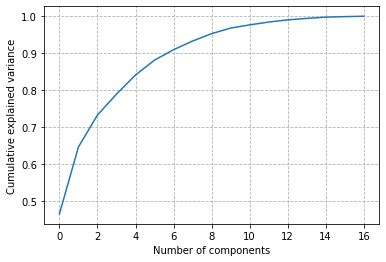

In [62]:
from sklearn.decomposition import PCA
pca1 = PCA().fit(std_trs)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.grid(True, linestyle = "--")

#### 3. Applying Principal Component Analysis

In [63]:
pca = PCA(n_components = 8)
x_pca = pca.fit_transform(std_trs)

In [64]:
df_pca = pd.DataFrame(x_pca)
df_pca

,0,1,2,3,4,5,6,7
0,-0.962853,2.908957,0.032715,2.015780,-1.060810,-0.274311,-0.464964,1.117783
1,-0.847274,2.952868,0.075165,2.045335,-1.001422,-0.204133,-0.499826,1.079471
2,0.663147,1.971112,1.057337,-0.845597,1.464413,0.264525,1.639714,0.755026
3,-0.271223,0.050576,-0.466262,-1.022320,-0.272989,0.672931,-0.053522,0.451527
4,1.315510,0.954072,-0.762220,-1.070480,0.127892,0.420196,0.467218,0.784440
...,...,...,...,...,...,...,...,...
200,2.644313,-1.493501,-1.435263,-0.122927,-0.323389,0.104129,-1.027977,-0.693465
201,3.427821,-0.924217,-1.670776,-0.166500,-0.383094,-0.092963,-1.031807,-0.582736
202,3.882526,-0.475876,-1.650367,0.517837,1.232639,0.576526,-0.239608,-0.202655
203,2.876310,-2.780627,1.834786,-0.382320,1.249347,2.152372,-0.063017,0.954800


Text(0, 0.5, 'Second PC')

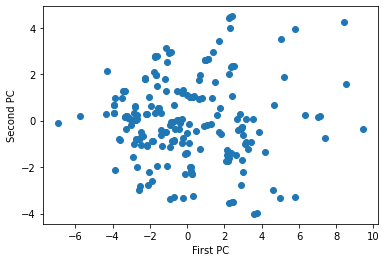

In [65]:
plt.scatter(x_pca[:,0],x_pca[:,1], cmap = 'RdYlBu')
plt.xlabel('First PC')
plt.ylabel('Second PC')

<AxesSubplot:>

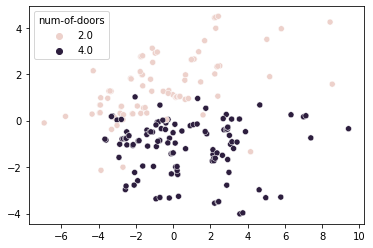

In [66]:
sns.scatterplot(x = x_pca[:,0],y = x_pca[:,1], hue = X['num-of-doors'])

## Anova Test

To test the dependency of categorical variable    
Anova Testing (cat with num)  
Chi square test (cat with cat)

# Remaining
Reduce categorical variables  
Machine Learning Modelling

In [67]:
df.shape

(205, 26)

In [68]:
df_obj = df.select_dtypes(include = "object")

In [69]:
new_df = pd.concat([df_obj, df_pca,  df['symboling']], axis = 1 )
new_df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system,0,1,2,3,4,5,6,7,symboling
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi,-0.962853,2.908957,0.032715,2.015780,-1.060810,-0.274311,-0.464964,1.117783,3
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi,-0.847274,2.952868,0.075165,2.045335,-1.001422,-0.204133,-0.499826,1.079471,3
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi,0.663147,1.971112,1.057337,-0.845597,1.464413,0.264525,1.639714,0.755026,1
3,audi,gas,std,sedan,fwd,front,ohc,mpfi,-0.271223,0.050576,-0.466262,-1.022320,-0.272989,0.672931,-0.053522,0.451527,2
4,audi,gas,std,sedan,4wd,front,ohc,mpfi,1.315510,0.954072,-0.762220,-1.070480,0.127892,0.420196,0.467218,0.784440,2


### Feature Importance 

In [70]:
new_df = pd.get_dummies(new_df, drop_first = True)
new_df.shape

(205, 52)

In [71]:
X = new_df.drop('symboling', axis = 1)
y = new_df.symboling

In [72]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [73]:
print(model.feature_importances_)

[3.88501474e-02 3.63407602e-01 1.82522786e-02 1.82464599e-02
 1.08622384e-01 1.71436845e-02 1.32304159e-02 1.51428321e-02
 1.43401960e-02 2.40678457e-03 5.86092094e-05 6.75583940e-04
 3.57439973e-03 3.06406633e-04 1.21978344e-03 4.67368580e-03
 4.56830666e-03 2.58692265e-03 6.51446903e-03 7.35204027e-03
 5.05508089e-04 3.45097325e-04 4.14050252e-03 4.65990404e-04
 2.05294475e-02 5.22216172e-04 1.15931274e-02 3.70819968e-02
 8.16837752e-02 4.41627585e-04 4.74939699e-03 2.34839691e-03
 8.72382892e-02 3.09700154e-02 6.11620381e-03 5.92882008e-03
 1.10530844e-02 8.05322690e-03 1.96764180e-03 1.08588797e-03
 1.57761652e-02 2.39287169e-03 1.96971717e-03 8.23848402e-05
 1.29696845e-02 0.00000000e+00 5.30642120e-04 0.00000000e+00
 5.93633469e-03 1.97854184e-03 3.70413449e-04]


In [74]:
feature_plot = pd.Series(model.feature_importances_,index = X.columns)
feature_plot

0                       0.038850
1                       0.363408
2                       0.018252
3                       0.018246
4                       0.108622
5                       0.017144
6                       0.013230
7                       0.015143
make_audi               0.014340
make_bmw                0.002407
make_chevrolet          0.000059
make_dodge              0.000676
make_honda              0.003574
make_isuzu              0.000306
make_jaguar             0.001220
make_mazda              0.004674
make_mercedes-benz      0.004568
make_mercury            0.002587
make_mitsubishi         0.006514
make_nissan             0.007352
make_peugot             0.000506
make_plymouth           0.000345
make_porsche            0.004141
make_renault            0.000466
make_saab               0.020529
make_subaru             0.000522
make_toyota             0.011593
make_volkswagen         0.037082
make_volvo              0.081684
fuel-type_gas           0.000442
aspiration

<AxesSubplot:>

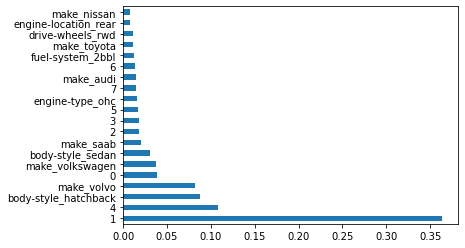

In [75]:
feature_plot.nlargest(20).plot(kind = 'barh')

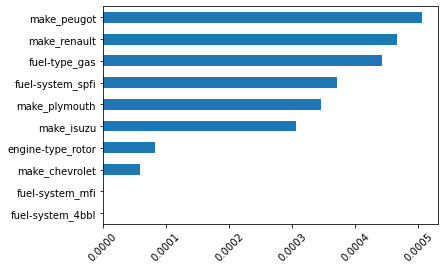

In [76]:
feature_plot.nsmallest(10).plot(kind = 'barh')
plt.xticks(rotation = 45);

  Currently, we don't seem to have enough understanding of which variable to remove using the above graphs.  
  Hence, we will keep all the variables in and work on it after looking at the results.

# Machine Learning Modelling

In [77]:
y.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

We can use linear regression algorithms to arrive at the above outcome

### Train Test Split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153, 51), (52, 51), (153,), (52,))

### Linear Regression

In [79]:
def algo(model):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    print("The mean squared error using {} is {} ".format(model, (mean_squared_error(model_pred, y_test).round(3))))
    print("Covariance % is ", model.score(X_train, y_train).round(3))

In [80]:
from sklearn.metrics import mean_squared_error
import math

In [81]:
from sklearn.linear_model import LinearRegression
algo(LinearRegression())

The mean squared error using LinearRegression() is 0.162 
Covariance % is  0.953


In [82]:
from sklearn.linear_model import Lasso
algo(Lasso())

The mean squared error using Lasso() is 1.174 
Covariance % is  0.297


In [83]:
from sklearn.linear_model import LassoLars
algo(LassoLars())

The mean squared error using LassoLars() is 1.616 
Covariance % is  0.0
